# Airline satisfaction problem: 
## 1. We are trying to figure what factors influnce the satisfaction of the passengers.
## 2. Then, based on these factors we will predict if the passenger satisfy or not.

### Let's dive into it..! 

## Import analysis libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(rc={'figure.figsize':[8,6]}, font_scale = 1.2)

## Read dataset

In [2]:
train = pd.read_csv('../input/airline-passenger-satisfaction/train.csv')
train

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,103899,94171,Female,disloyal Customer,23,Business travel,Eco,192,2,1,...,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
103900,103900,73097,Male,Loyal Customer,49,Business travel,Business,2347,4,4,...,5,5,5,5,5,5,4,0,0.0,satisfied
103901,103901,68825,Male,disloyal Customer,30,Business travel,Business,1995,1,1,...,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
103902,103902,54173,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,...,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied


In [3]:
test = pd.read_csv('../input/airline-passenger-satisfaction/test.csv')
test

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,...,2,2,2,2,4,2,4,0,20.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25971,25971,78463,Male,disloyal Customer,34,Business travel,Business,526,3,3,...,4,3,2,4,4,5,4,0,0.0,neutral or dissatisfied
25972,25972,71167,Male,Loyal Customer,23,Business travel,Business,646,4,4,...,4,4,5,5,5,5,4,0,0.0,satisfied
25973,25973,37675,Female,Loyal Customer,17,Personal Travel,Eco,828,2,5,...,2,4,3,4,5,4,2,0,0.0,neutral or dissatisfied
25974,25974,90086,Male,Loyal Customer,14,Business travel,Business,1127,3,3,...,4,3,2,5,4,5,4,0,0.0,satisfied


**Note:**
> dataset is divided into **train set** and **test set**, we will merge them in one dataset in case of analysis.

In [4]:
df = pd.concat([train, test])
del df['Unnamed: 0']
df

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25971,78463,Male,disloyal Customer,34,Business travel,Business,526,3,3,3,...,4,3,2,4,4,5,4,0,0.0,neutral or dissatisfied
25972,71167,Male,Loyal Customer,23,Business travel,Business,646,4,4,4,...,4,4,5,5,5,5,4,0,0.0,satisfied
25973,37675,Female,Loyal Customer,17,Personal Travel,Eco,828,2,5,1,...,2,4,3,4,5,4,2,0,0.0,neutral or dissatisfied
25974,90086,Male,Loyal Customer,14,Business travel,Business,1127,3,3,3,...,4,3,2,5,4,5,4,0,0.0,satisfied


## Explore data

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129880 entries, 0 to 25975
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 129880 non-null  int64  
 1   Gender                             129880 non-null  object 
 2   Customer Type                      129880 non-null  object 
 3   Age                                129880 non-null  int64  
 4   Type of Travel                     129880 non-null  object 
 5   Class                              129880 non-null  object 
 6   Flight Distance                    129880 non-null  int64  
 7   Inflight wifi service              129880 non-null  int64  
 8   Departure/Arrival time convenient  129880 non-null  int64  
 9   Ease of Online booking             129880 non-null  int64  
 10  Gate location                      129880 non-null  int64  
 11  Food and drink                     12988

**Notes:**
> * Our dataset consists of **129880 rows** and **24 columns**.
> * All feature types is correct there is no problem we are ready.

**Note:** 
> All ready, as a reminder we are trying to figure out what makes passenger satisfy.

## Data Analysis (EDA)

In [6]:
import textwrap
def wrap_labels(ax, width, break_long_words=False):
    labels = []
    for label in ax.get_xticklabels():
        text = label.get_text()
        labels.append(textwrap.fill(text, width=width,
                      break_long_words=break_long_words))
    ax.set_xticklabels(labels, rotation=0)

In [7]:
df['satisfaction'].value_counts()

neutral or dissatisfied    73452
satisfied                  56428
Name: satisfaction, dtype: int64

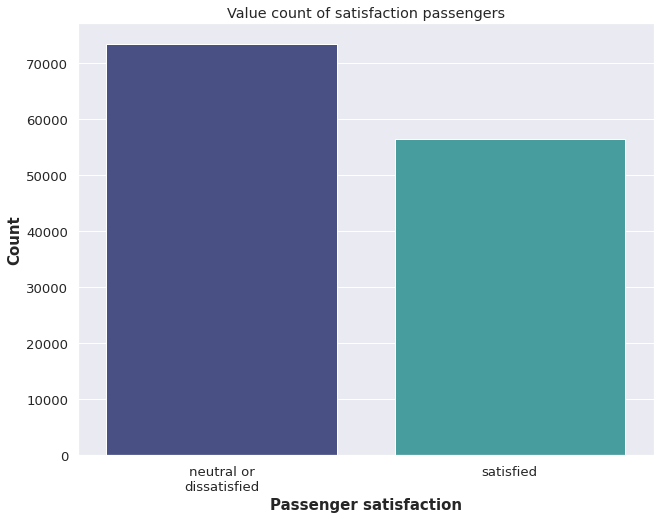

In [8]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_axes([0,0,1,1])
sns.countplot(data = df, x = 'satisfaction', palette='mako')
plt.title('Value count of satisfaction passengers')
ax.set_xlabel("Passenger satisfaction",fontsize=15, weight='semibold')
ax.set_ylabel("Count",fontsize=15, weight='semibold')
wrap_labels(ax, 10)

**Notes:**
> There is a noticeable difference here..! **neutral or dissatisfied passengers** is more than **satisfied passengers** in about **17024**.

In [9]:
df['Gender'].value_counts()

Female    65899
Male      63981
Name: Gender, dtype: int64

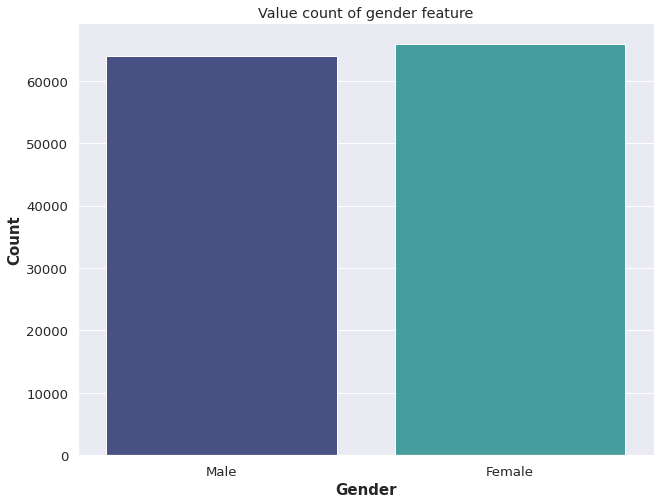

In [10]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_axes([0,0,1,1])
sns.countplot(data = df, x = 'Gender', palette='mako')
plt.title('Value count of gender feature')
ax.set_xlabel("Gender",fontsize=15, weight='semibold')
ax.set_ylabel("Count",fontsize=15, weight='semibold')
wrap_labels(ax, 10)

**Notes:**
> As we see the number of **males and females** almost the same there is a slightly differe.

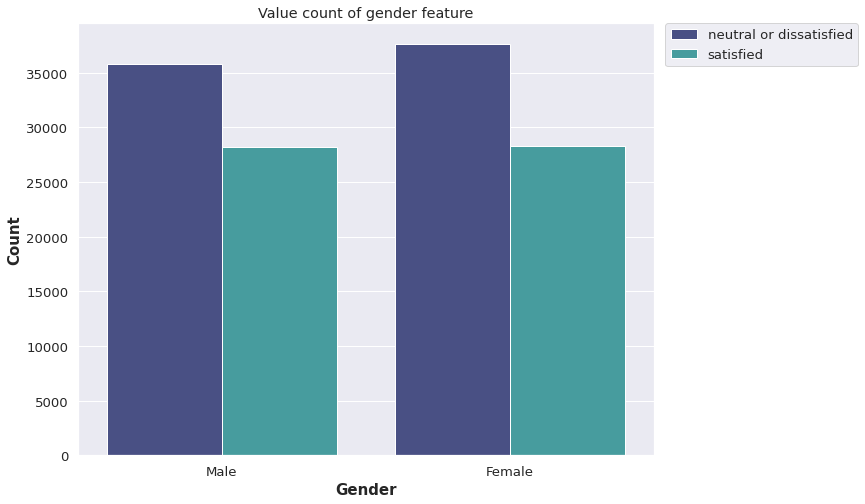

In [11]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_axes([0,0,1,1])
sns.countplot(data = df, x = 'Gender', hue = 'satisfaction', palette='mako')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.title('Value count of gender feature')
ax.set_xlabel("Gender",fontsize=15, weight='semibold')
ax.set_ylabel("Count",fontsize=15, weight='semibold')
wrap_labels(ax, 10)

**Note:**
> As we said before the count of **males and females** almost the same, that leads to it's correlation with satisfaction of the passenger is low

In [12]:
df['Customer Type'].value_counts()

Loyal Customer       106100
disloyal Customer     23780
Name: Customer Type, dtype: int64

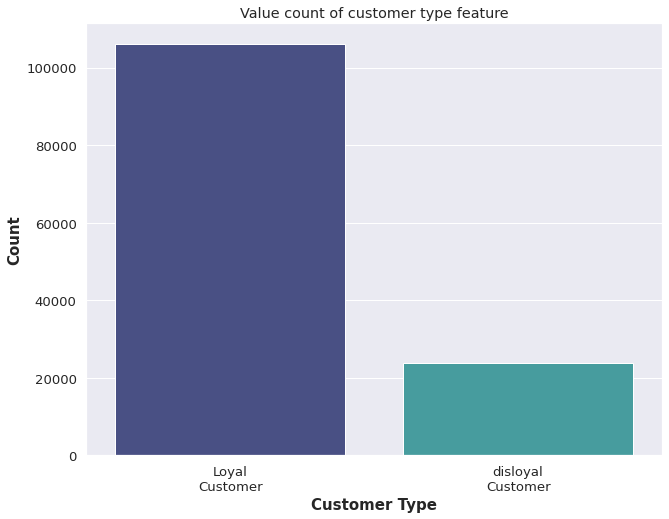

In [13]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_axes([0,0,1,1])
sns.countplot(data = df, x = 'Customer Type', palette='mako')
plt.title('Value count of customer type feature')
ax.set_xlabel("Customer Type",fontsize=15, weight='semibold')
ax.set_ylabel("Count",fontsize=15, weight='semibold')
wrap_labels(ax, 10)

**Notes:**
> Ohh..! that's interesting our **Loyal Customers** much more than **Disloyal Customers** that looks good for our services.
> let's check this with satisfaction

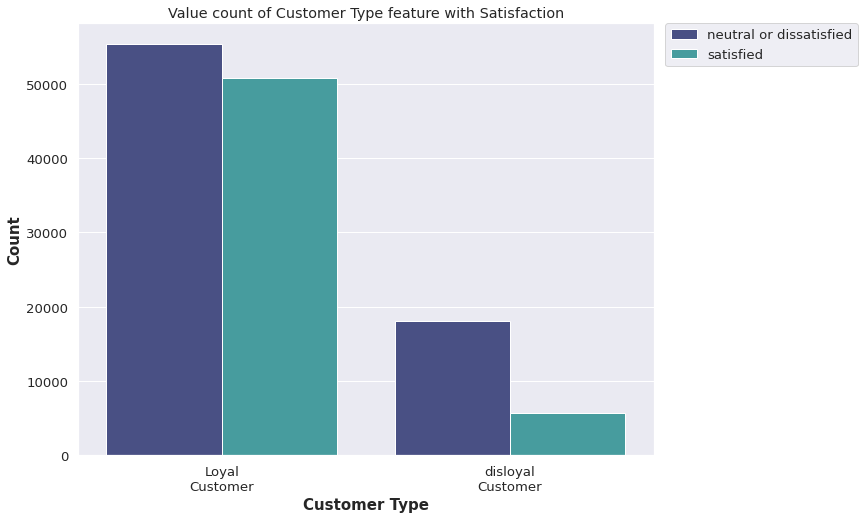

In [14]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_axes([0,0,1,1])
sns.countplot(data = df, x = 'Customer Type', hue = 'satisfaction', palette='mako')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.title('Value count of Customer Type feature with Satisfaction')
ax.set_xlabel("Customer Type",fontsize=15, weight='semibold')
ax.set_ylabel("Count",fontsize=15, weight='semibold')
wrap_labels(ax, 10)

**Notes:**
> * As we see **Disloyal Customers** have more dissatisfaction and that makes sense as they are not loyal customers.
> * But in **Loyal Customers** also have more dissatisfaction and that's a problem.

In [15]:
df['Age'].describe()

count    129880.000000
mean         39.427957
std          15.119360
min           7.000000
25%          27.000000
50%          40.000000
75%          51.000000
max          85.000000
Name: Age, dtype: float64

**Notes:**
> Average of ages here is **39 years old**.

Text(0.5, 1.0, 'Distribution of Age')

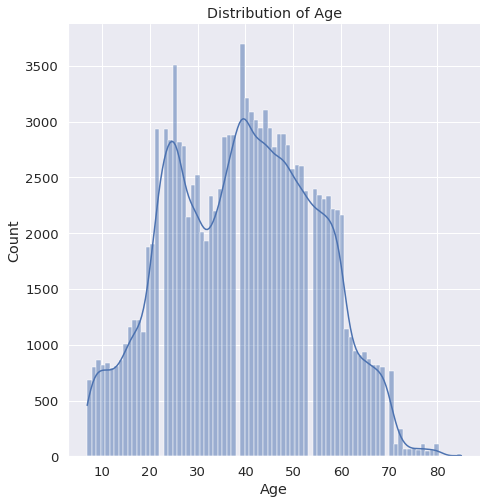

In [16]:
sns.displot(data = df['Age'], palette='mako', kde=True, height = 7)
plt.title('Distribution of Age')

**Notes:**
> * There is not much childrens here.
> * There is a noticeable increasing in count when we come to age **25**.
> * From age **58** we notice that the count come low.
> * **That means we are working in youth people in age between (25 - 60)**. 

In [17]:
df['Type of Travel'].unique()

array(['Personal Travel', 'Business travel'], dtype=object)

In [18]:
df['Type of Travel'].value_counts()

Business travel    89693
Personal Travel    40187
Name: Type of Travel, dtype: int64

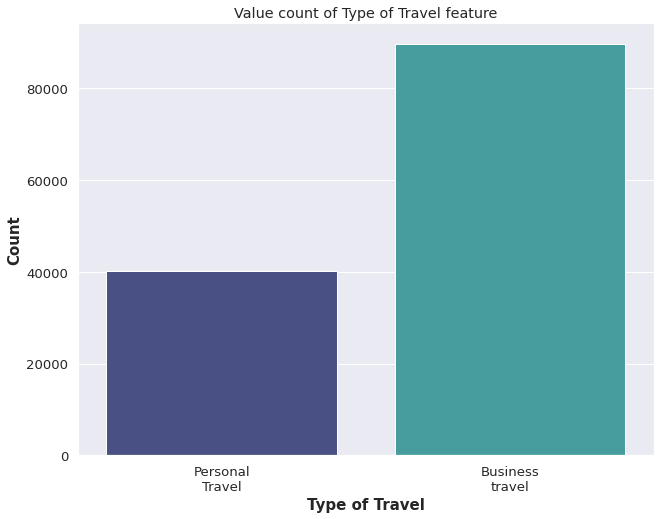

In [19]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_axes([0,0,1,1])
sns.countplot(data = df, x = 'Type of Travel', palette='mako')
plt.title('Value count of Type of Travel feature')
ax.set_xlabel("Type of Travel",fontsize=15, weight='semibold')
ax.set_ylabel("Count",fontsize=15, weight='semibold')
wrap_labels(ax, 10)

**Notes:**
> * We have only 2 types of travel **Personal Travel and Business Travel**
> * Out **Business Travel** much more than **Personal Travel**.
> * **That means we are working with Customers in Business Layer more.**

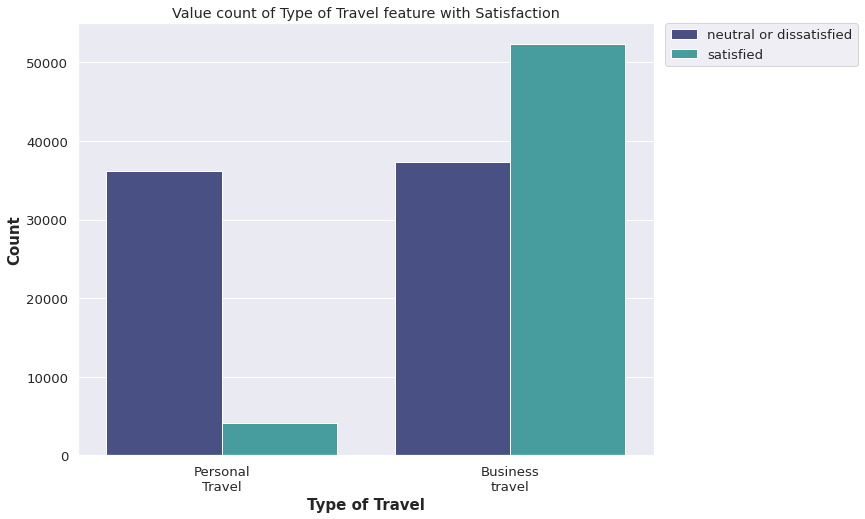

In [20]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_axes([0,0,1,1])
sns.countplot(data = df, x = 'Type of Travel', hue = 'satisfaction', palette='mako')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.title('Value count of Type of Travel feature with Satisfaction')
ax.set_xlabel("Type of Travel",fontsize=15, weight='semibold')
ax.set_ylabel("Count",fontsize=15, weight='semibold')
wrap_labels(ax, 10)

**Notes:**
> * We are not good at **Personal Travel** cuz the dissatisfied customers is much much much more than satisfied and that explains that **Business Travel more than Personal** we need to see what is the problems of **Personal Travel**.
> * In **Business Travel** satisfied customers is much more than dissatisfied ones and that's good very good, but still No. of dissatisfied customers not low.

In [21]:
df['Class'].unique()

array(['Eco Plus', 'Business', 'Eco'], dtype=object)

In [22]:
df['Class'].value_counts()

Business    62160
Eco         58309
Eco Plus     9411
Name: Class, dtype: int64

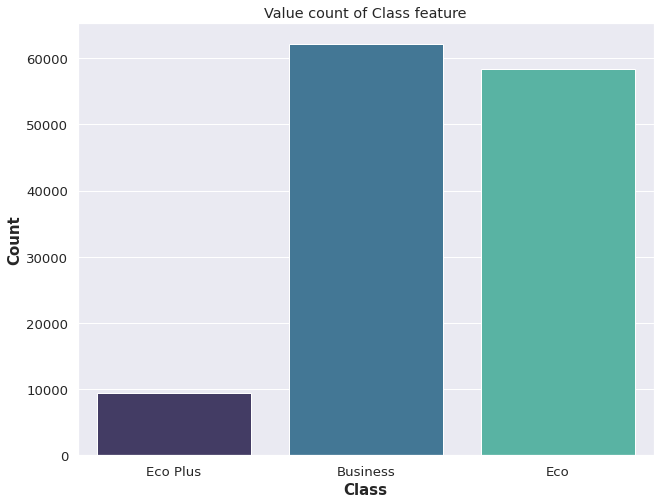

In [23]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_axes([0,0,1,1])
sns.countplot(data = df, x = 'Class', palette='mako')
plt.title('Value count of Class feature')
ax.set_xlabel("Class",fontsize=15, weight='semibold')
ax.set_ylabel("Count",fontsize=15, weight='semibold')
wrap_labels(ax, 10)

**Notes:**
> * We have only 3 classes **Business - Eco - Eco Plus**.
> * Almost no body uses **Eco Plus** class.

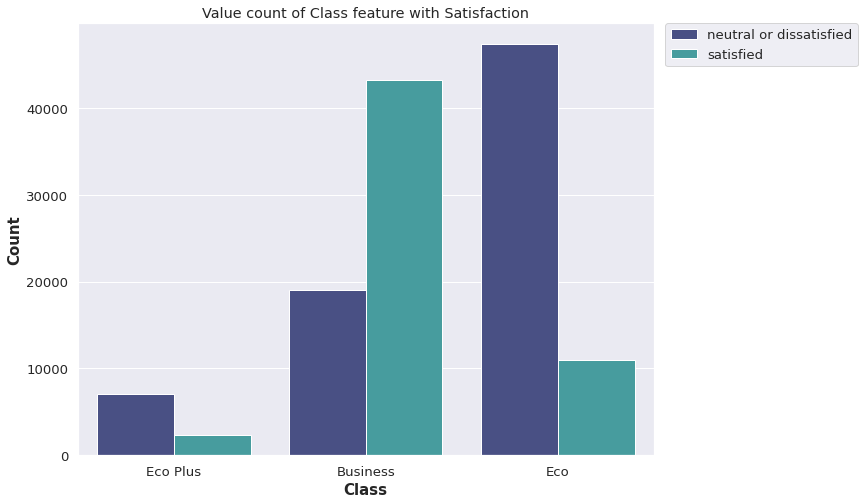

In [24]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_axes([0,0,1,1])
sns.countplot(data = df, x = 'Class', hue = 'satisfaction', palette='mako')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.title('Value count of Class feature with Satisfaction')
ax.set_xlabel("Class",fontsize=15, weight='semibold')
ax.set_ylabel("Count",fontsize=15, weight='semibold')
wrap_labels(ax, 10)

**Notes:**
> * In **Eco** class there is more passenger mad, let's see why by checking what **Type of Travel** in this class.

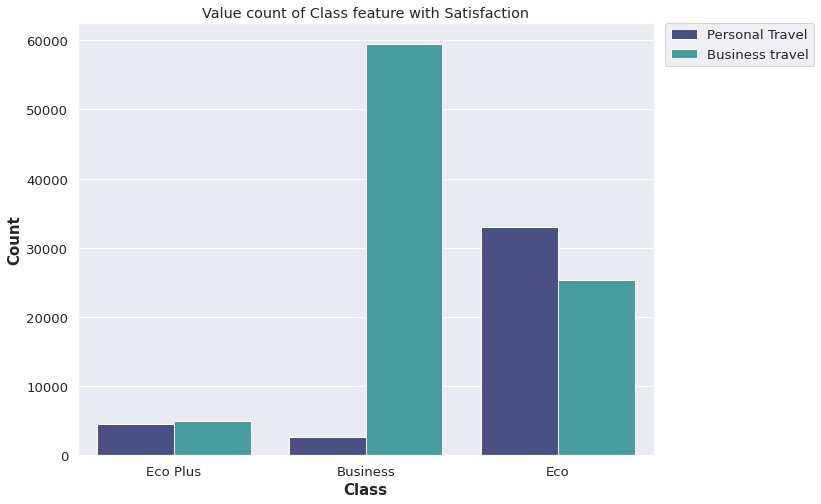

In [25]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_axes([0,0,1,1])
sns.countplot(data = df, x = 'Class', hue = 'Type of Travel', palette='mako')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.title('Value count of Class feature with Satisfaction')
ax.set_xlabel("Class",fontsize=15, weight='semibold')
ax.set_ylabel("Count",fontsize=15, weight='semibold')
wrap_labels(ax, 10)

**Notes:**
> * As we see in **Eco class** there is quite No. of **Business Travel** passenger take **Eco** and that not good for them cuz they want business qulity, so they dissatisfy.
> * We need if the passenger in Business flight recommend for them **Business Class**.

In [26]:
df['Flight Distance'].describe()

count    129880.000000
mean       1190.316392
std         997.452477
min          31.000000
25%         414.000000
50%         844.000000
75%        1744.000000
max        4983.000000
Name: Flight Distance, dtype: float64

**Notes:**
> * Average of flight distances is **1190 km**
> * **And that means our not take much time in air**.

Text(0.5, 1.0, 'Distribution of Age')

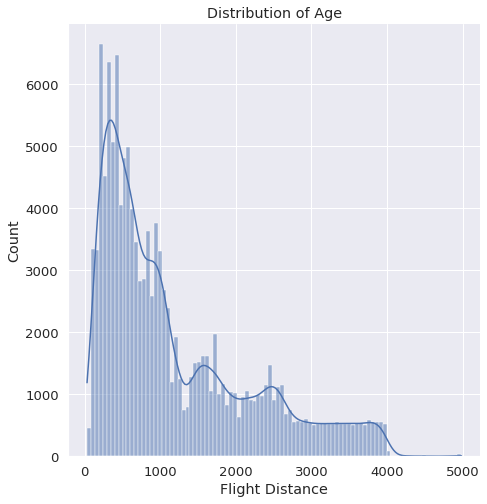

In [27]:
sns.displot(data = df['Flight Distance'], palette='mako', kde=True, height = 7)
plt.title('Distribution of Age')

**Notes:**
> * We notice that we are working on small distance flights as the count of small kilometers flights much more than others.

**Notes:**
> Now we are gonna use rating and other measures to determine cases of satisfaction.

In [28]:
def sub_bar_plots(cols, cat):
    fig, axis = plt.subplots(9, 2, figsize=(20, 60))
    fig.tight_layout(pad=3.0)
    for features, ax in zip(cols, axis.ravel()):
        ax = sns.barplot(data = df, x = 'satisfaction', y = features, hue = cat, palette='mako', ax = ax)
        wrap_labels(ax, 10)

In [29]:
cols = df.select_dtypes([np.number]).columns[2:]
cols

Index(['Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes',
       'Arrival Delay in Minutes'],
      dtype='object')

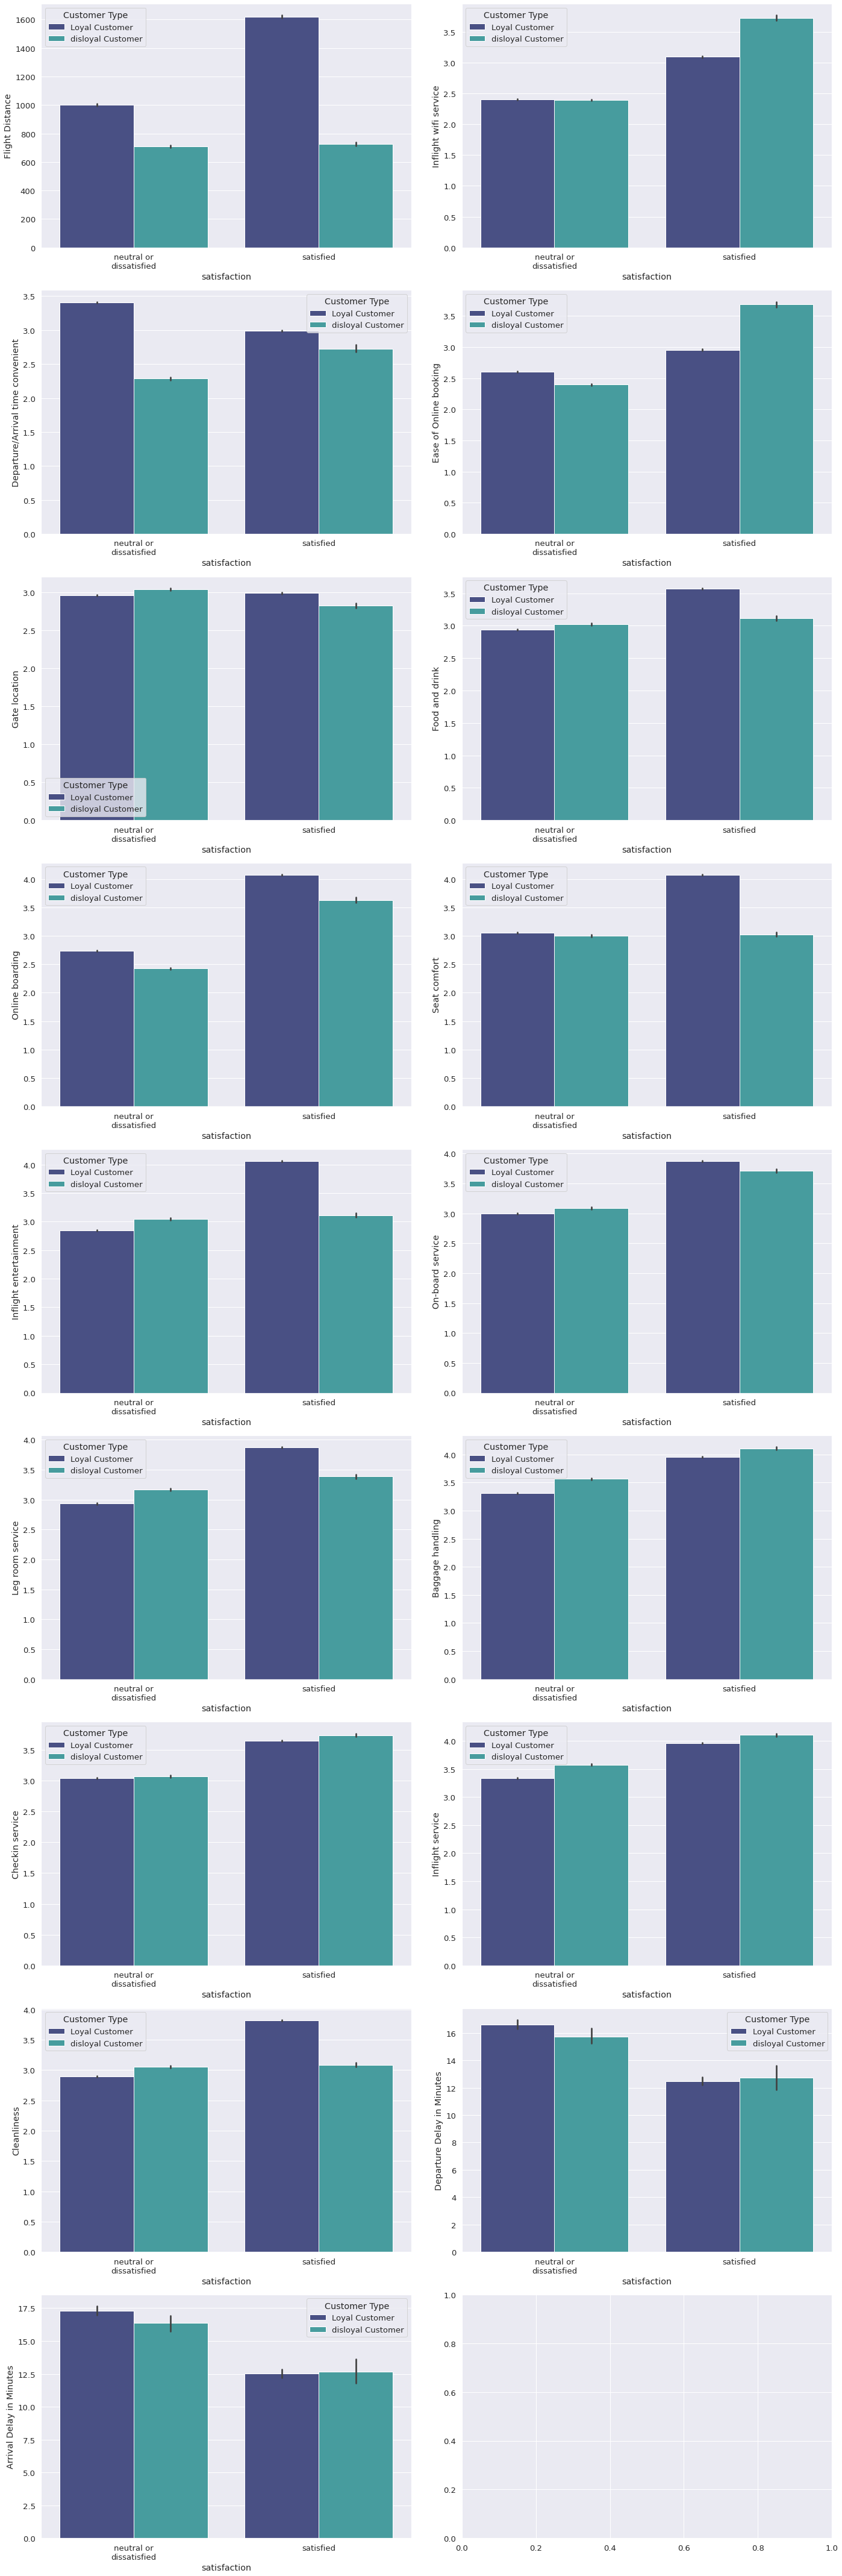

In [30]:
sub_bar_plots(cols, 'Customer Type')

**Notes:**
> * For loyal customer: 
    * Satisfy with long distance flights.
    * Not a fan with wifi service. 
    * Arrival time and ease of booking have almost the same rating but there is much dissatisfaction here so that's a problem need to be solve. 
    * They are satisfy with seat comfort and inflight entertainment that match long distance flights and that's good.
    * Cleanliness most of them satify with degree of clean but there is big No. of dissatisfaction and that's importent thing we need to look at. 
> * For disloyal customer:
    * Doesn't matter if distance is big or not almost the same rating. 
    * Satisfy with inflight wifi service, ease of online booking, and cleanliness.
> * **Both loyal and disloyal customer feel satisfy when delay is not beyond 12.5 Min.**

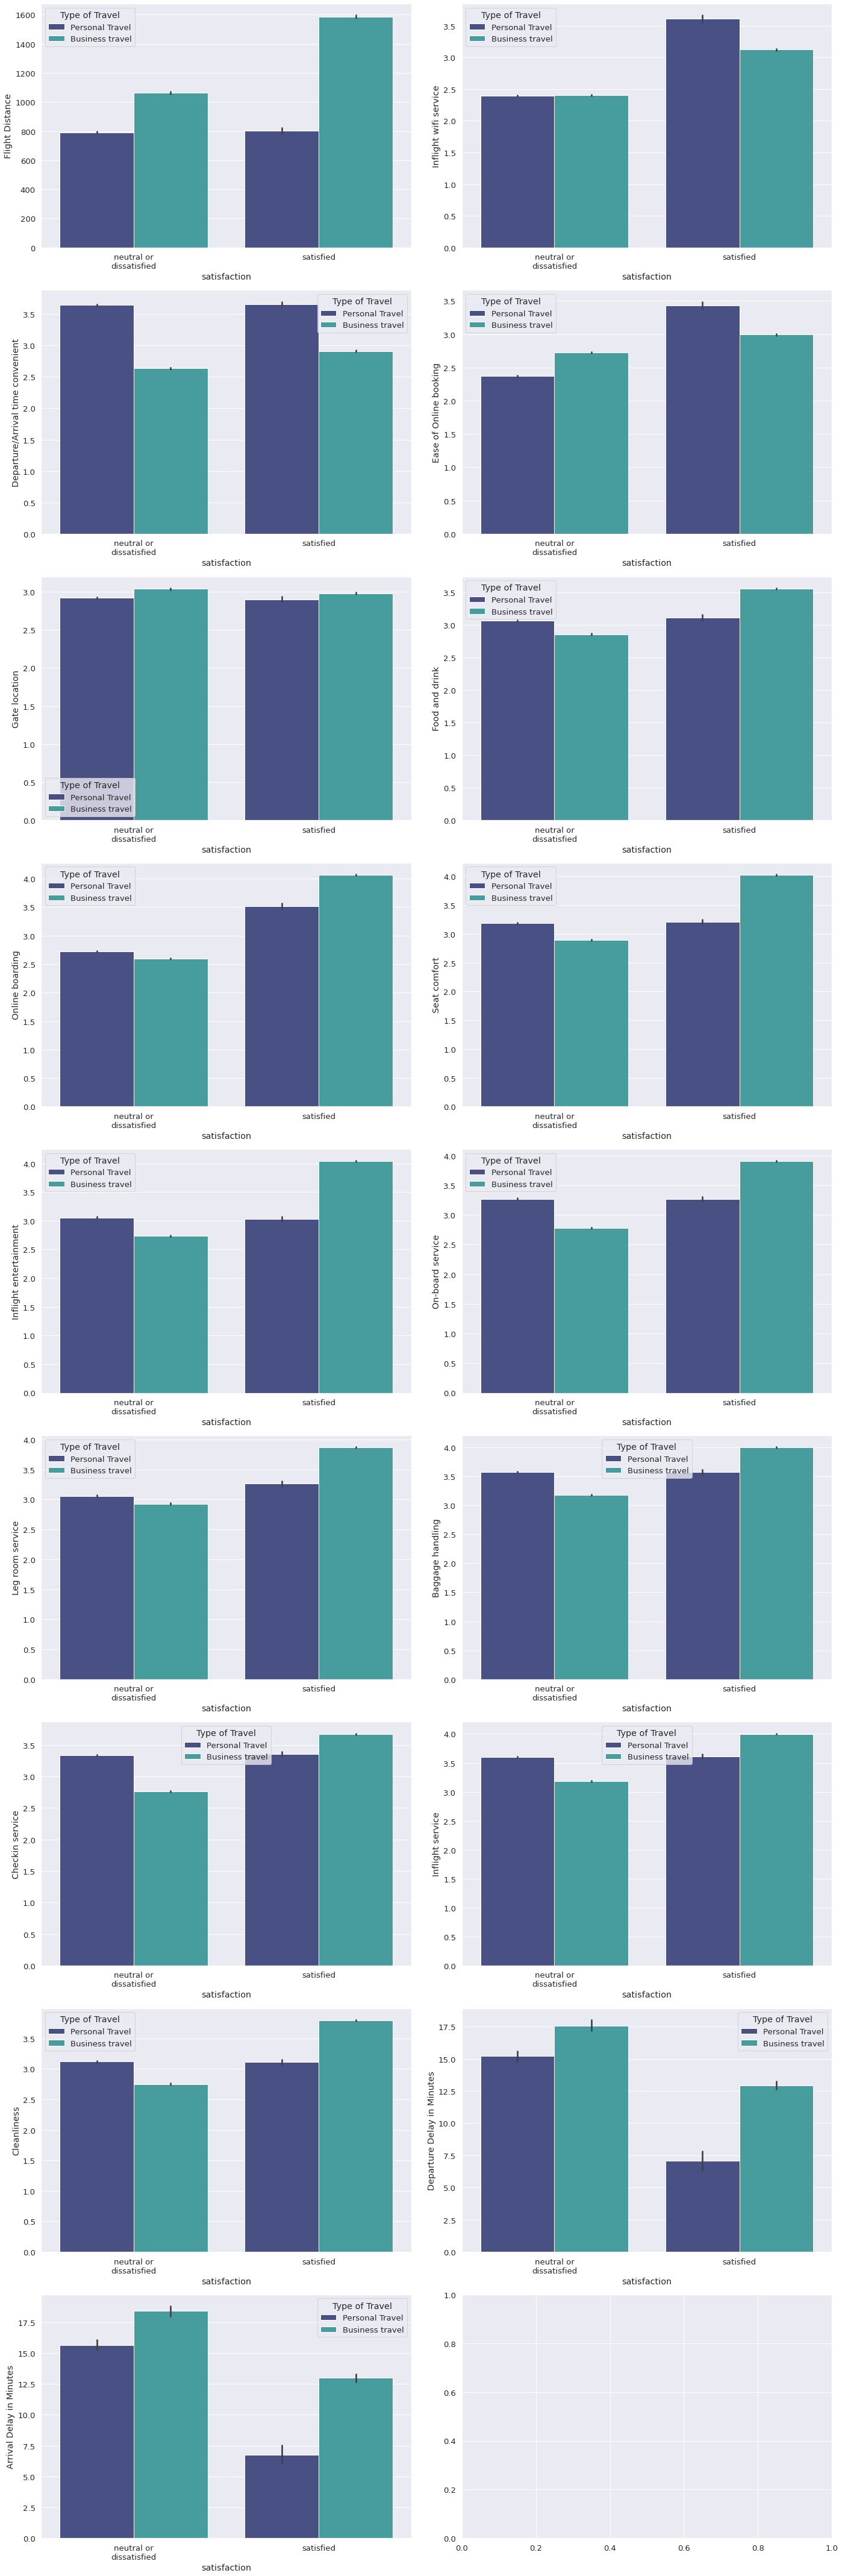

In [31]:
sub_bar_plots(cols, 'Type of Travel')

**Notes:**
> * In business travel:
    * Customer who is in business travel satisfy with long flight distance.
    * Food and drink quality is good in business flights that match the business and that's good.
    * Seat comfort is good with business flights.
    * On-board services also good at business flights.
> * In personal travel:
    * Doesn't matter if the flight distance is too big or not.
    * Food and drink quality is almost the same rating.
    * Most of rating in personal travels are the same.
> * **As we see now the company is more good with business travels than personal travels.**

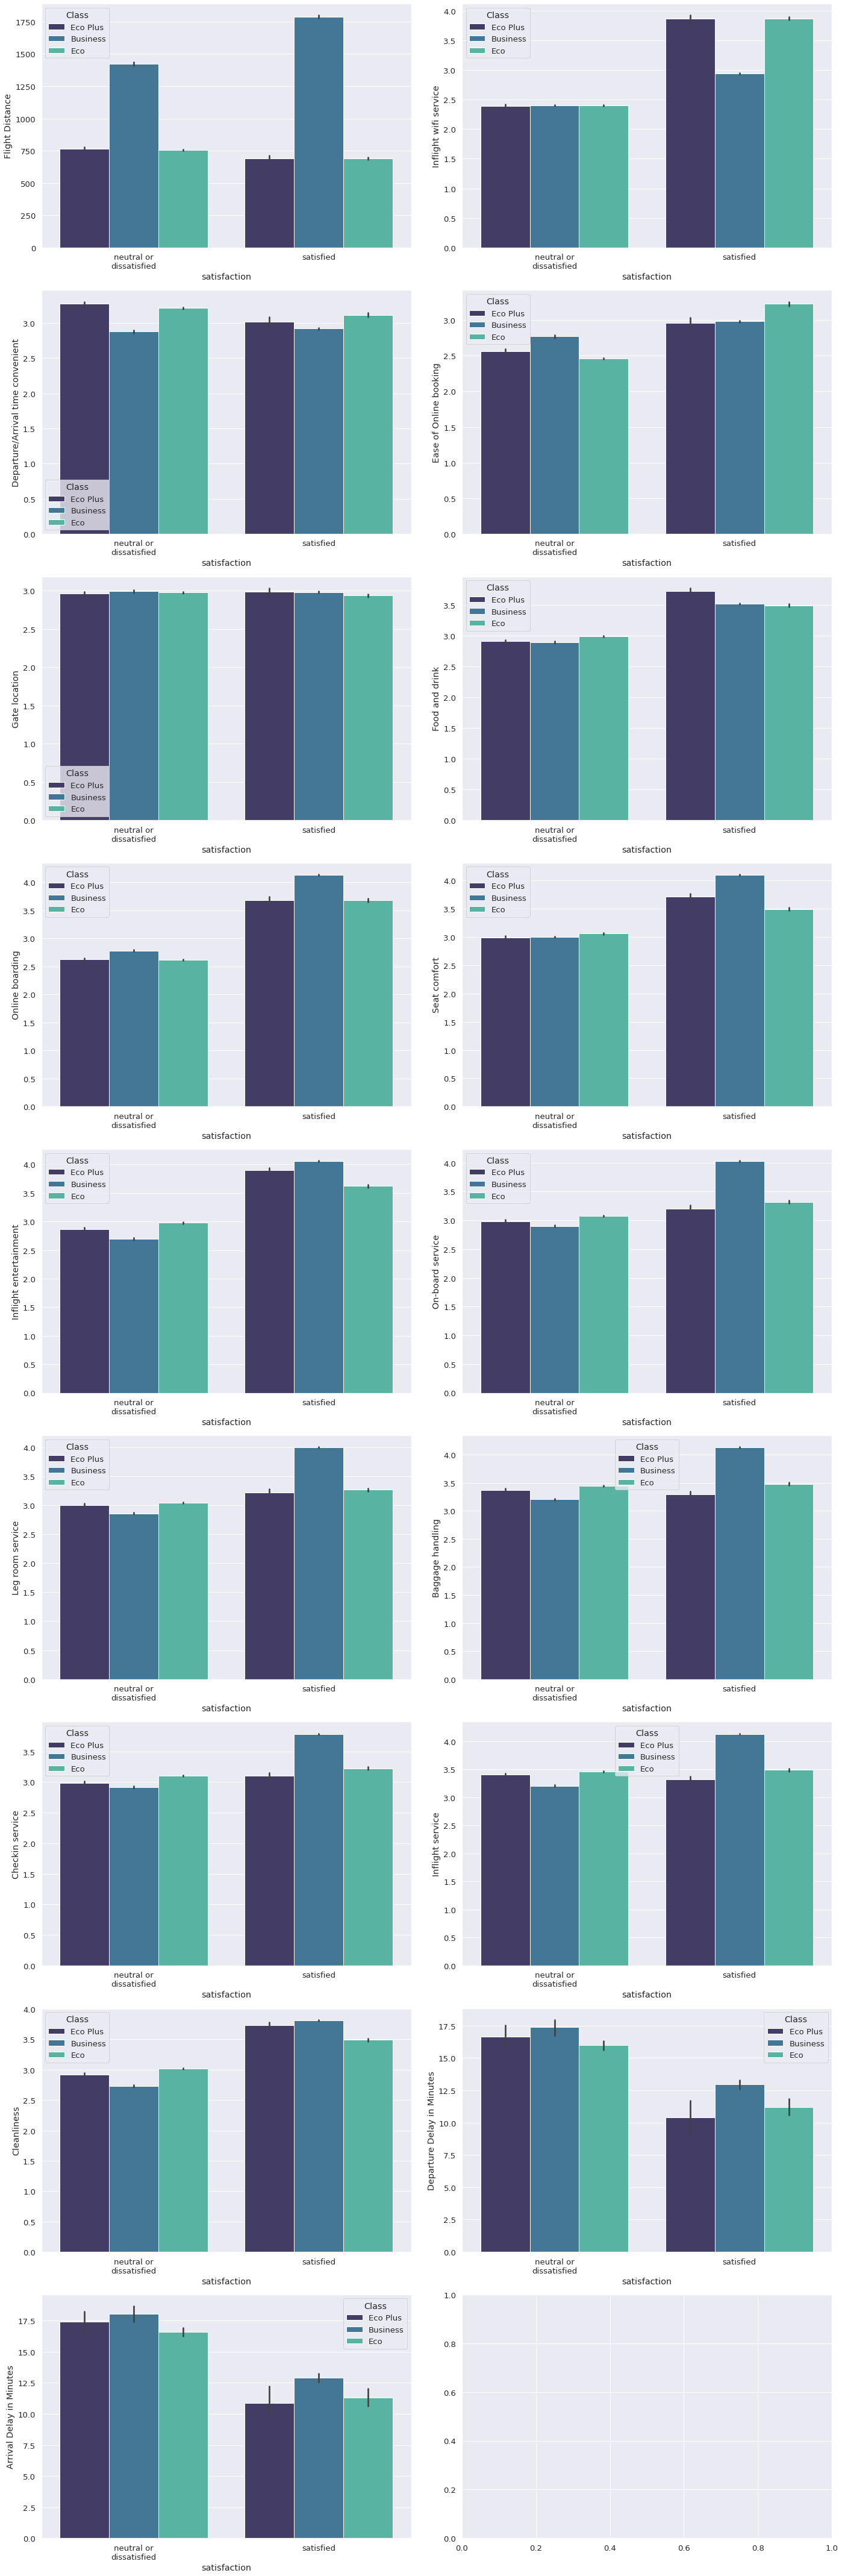

In [32]:
sub_bar_plots(cols, 'Class')

**Notes:**
> * We excel at business at all stages of analysis and what match with this kind of travels.
> * Eco and Eco plus almost the same in rating or services we provide.

## Data Preprocessing

In [33]:
df.isna().sum()

id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
satisfaction                           0
dtype: int64

**Notes:**
> Arrival Delay in Minutes has missing values not that match big Nan values compare the size of dataset so we will dropna values.

In [34]:
df = df.dropna()
df.isna().sum()

id                                   0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

**Notes:**
> Clean, let's see correlation between features.

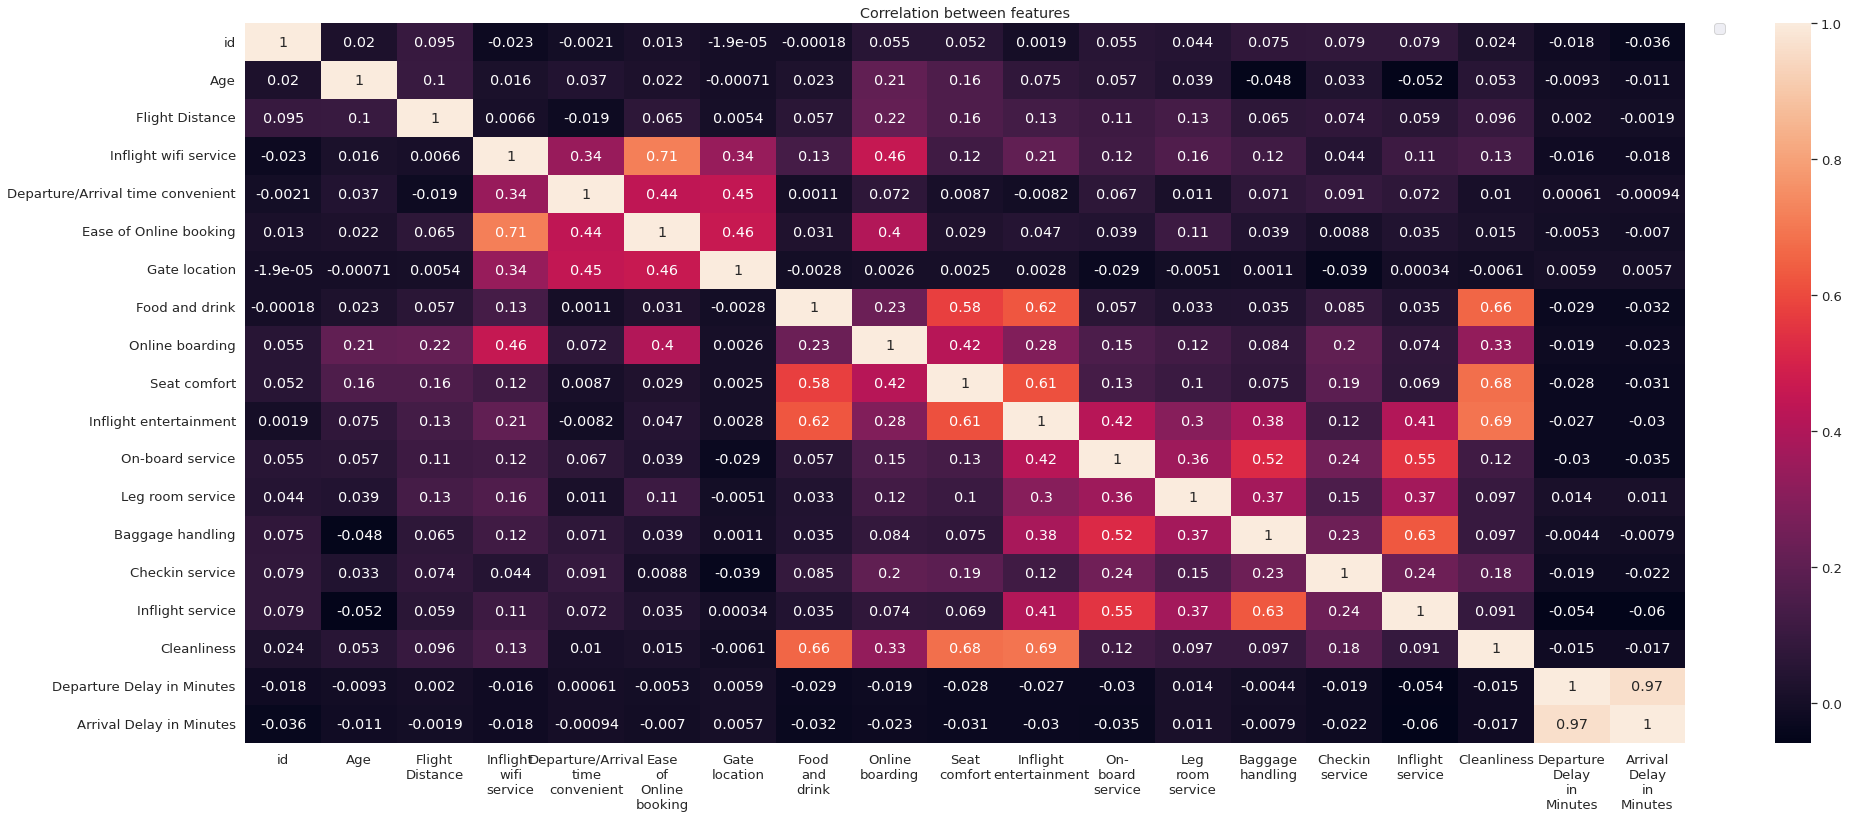

In [35]:
fig = plt.figure(figsize=(25,10))
ax = fig.add_axes([0,0,1,1])
sns.heatmap(df.corr(), annot=True)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.title('Correlation between features')
wrap_labels(ax, 1)

In [36]:
del df['Departure Delay in Minutes']
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129487 entries, 0 to 25975
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 129487 non-null  int64  
 1   Gender                             129487 non-null  object 
 2   Customer Type                      129487 non-null  object 
 3   Age                                129487 non-null  int64  
 4   Type of Travel                     129487 non-null  object 
 5   Class                              129487 non-null  object 
 6   Flight Distance                    129487 non-null  int64  
 7   Inflight wifi service              129487 non-null  int64  
 8   Departure/Arrival time convenient  129487 non-null  int64  
 9   Ease of Online booking             129487 non-null  int64  
 10  Gate location                      129487 non-null  int64  
 11  Food and drink                     12948

**Notes:**
> * There is a significat correlation between **Departure Delay in Minutes and Arrival Delay in Minutes** so we will drop one of 2 freatures to avoid multicolinearity problem.
> * Encoding for categorical data, as our categorical columns not ordinal columns we will use getdummies function to encode them.

In [37]:
df = pd.get_dummies(data = df, columns = ['Gender', 'Customer Type', 'Type of Travel', 
                                         'Class'], drop_first=True)
df

,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,...,Checkin service,Inflight service,Cleanliness,Arrival Delay in Minutes,satisfaction,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel,Class_Eco,Class_Eco Plus
0,70172,13,460,3,4,3,1,5,3,5,...,4,5,5,18.0,neutral or dissatisfied,1,0,1,0,1
1,5047,25,235,3,2,3,3,1,3,1,...,1,4,1,6.0,neutral or dissatisfied,1,1,0,0,0
2,110028,26,1142,2,2,2,2,5,5,5,...,4,4,5,0.0,satisfied,0,0,0,0,0
3,24026,25,562,2,5,5,5,2,2,2,...,1,4,2,9.0,neutral or dissatisfied,0,0,0,0,0
4,119299,61,214,3,3,3,3,4,5,5,...,3,3,3,0.0,satisfied,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25971,78463,34,526,3,3,3,1,4,3,4,...,4,5,4,0.0,neutral or dissatisfied,1,1,0,0,0
25972,71167,23,646,4,4,4,4,4,4,4,...,5,5,4,0.0,satisfied,1,0,0,0,0
25973,37675,17,828,2,5,1,5,2,1,2,...,5,4,2,0.0,neutral or dissatisfied,0,0,1,1,0
25974,90086,14,1127,3,3,3,3,4,4,4,...,4,5,4,0.0,satisfied,1,0,0,0,0


**Notes:**
> All good, go split data.
> We will check convert numeric columns to numeric as we make sure all data is good.

In [38]:
cols = ['id', 'Age', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Arrival Delay in Minutes',
       'Gender_Male', 'Customer Type_disloyal Customer',
       'Type of Travel_Personal Travel', 'Class_Eco', 'Class_Eco Plus']

In [39]:
for i in cols:
    df[i] = pd.to_numeric(df[i], errors = 'coerce')
df

,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,...,Checkin service,Inflight service,Cleanliness,Arrival Delay in Minutes,satisfaction,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel,Class_Eco,Class_Eco Plus
0,70172,13,460,3,4,3,1,5,3,5,...,4,5,5,18.0,neutral or dissatisfied,1,0,1,0,1
1,5047,25,235,3,2,3,3,1,3,1,...,1,4,1,6.0,neutral or dissatisfied,1,1,0,0,0
2,110028,26,1142,2,2,2,2,5,5,5,...,4,4,5,0.0,satisfied,0,0,0,0,0
3,24026,25,562,2,5,5,5,2,2,2,...,1,4,2,9.0,neutral or dissatisfied,0,0,0,0,0
4,119299,61,214,3,3,3,3,4,5,5,...,3,3,3,0.0,satisfied,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25971,78463,34,526,3,3,3,1,4,3,4,...,4,5,4,0.0,neutral or dissatisfied,1,1,0,0,0
25972,71167,23,646,4,4,4,4,4,4,4,...,5,5,4,0.0,satisfied,1,0,0,0,0
25973,37675,17,828,2,5,1,5,2,1,2,...,5,4,2,0.0,neutral or dissatisfied,0,0,1,1,0
25974,90086,14,1127,3,3,3,3,4,4,4,...,4,5,4,0.0,satisfied,1,0,0,0,0


In [40]:
df['satisfaction'].unique()

array(['neutral or dissatisfied', 'satisfied'], dtype=object)

In [41]:
dic = {'satisfied' : 1, 'neutral or dissatisfied': 0}
df['satisfaction'] = df['satisfaction'].map(dic)
df

,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,...,Checkin service,Inflight service,Cleanliness,Arrival Delay in Minutes,satisfaction,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel,Class_Eco,Class_Eco Plus
0,70172,13,460,3,4,3,1,5,3,5,...,4,5,5,18.0,0,1,0,1,0,1
1,5047,25,235,3,2,3,3,1,3,1,...,1,4,1,6.0,0,1,1,0,0,0
2,110028,26,1142,2,2,2,2,5,5,5,...,4,4,5,0.0,1,0,0,0,0,0
3,24026,25,562,2,5,5,5,2,2,2,...,1,4,2,9.0,0,0,0,0,0,0
4,119299,61,214,3,3,3,3,4,5,5,...,3,3,3,0.0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25971,78463,34,526,3,3,3,1,4,3,4,...,4,5,4,0.0,0,1,1,0,0,0
25972,71167,23,646,4,4,4,4,4,4,4,...,5,5,4,0.0,1,1,0,0,0,0
25973,37675,17,828,2,5,1,5,2,1,2,...,5,4,2,0.0,0,0,0,1,1,0
25974,90086,14,1127,3,3,3,3,4,4,4,...,4,5,4,0.0,1,1,0,0,0,0


**Notes:**
> * Now we consider that **satisfy = 1, neutral or dissatisfied = 0**.

In [42]:
c = ['Gender_Male', 'Customer Type_disloyal Customer', 'Type of Travel_Personal Travel', 'Class_Eco', 'Class_Eco Plus']
for i in c:
    df[i] = df[i].astype(np.int)
    print(df[i].dtype)

int64
int64
int64
int64
int64


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  This is separate from the ipykernel package so we can avoid doing imports until


In [43]:
X = df.drop('satisfaction', axis = 1).iloc[:,1:]
y = df['satisfaction']
X

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,...,Baggage handling,Checkin service,Inflight service,Cleanliness,Arrival Delay in Minutes,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel,Class_Eco,Class_Eco Plus
0,13,460,3,4,3,1,5,3,5,5,...,4,4,5,5,18.0,1,0,1,0,1
1,25,235,3,2,3,3,1,3,1,1,...,3,1,4,1,6.0,1,1,0,0,0
2,26,1142,2,2,2,2,5,5,5,5,...,4,4,4,5,0.0,0,0,0,0,0
3,25,562,2,5,5,5,2,2,2,2,...,3,1,4,2,9.0,0,0,0,0,0
4,61,214,3,3,3,3,4,5,5,3,...,4,3,3,3,0.0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25971,34,526,3,3,3,1,4,3,4,4,...,4,4,5,4,0.0,1,1,0,0,0
25972,23,646,4,4,4,4,4,4,4,4,...,5,5,5,4,0.0,1,0,0,0,0
25973,17,828,2,5,1,5,2,1,2,2,...,4,5,4,2,0.0,0,0,1,1,0
25974,14,1127,3,3,3,3,4,4,4,4,...,5,4,5,4,0.0,1,0,0,0,0


In [44]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state=0)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(90640, 22)
(38847, 22)
(90640,)
(38847,)


## Maching Learning Model

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, plot_roc_curve
import warnings

warnings.filterwarnings("ignore")

In [46]:
logisreg_clf = LogisticRegression()
svm_clf = SVC()
dt_clf = DecisionTreeClassifier()
rf_clf = RandomForestClassifier()
XGB_clf = XGBClassifier()

In [47]:
clf_list = [logisreg_clf, svm_clf, dt_clf, rf_clf, XGB_clf]
clf_name_list = ['Logistic Regression', 'Support Vector Machine', 'Decision Tree', 'Random Forest', 'XGBClassifier']

for clf in clf_list:
    clf.fit(X_train,y_train)

In [48]:
train_acc_list = []
test_acc_list = []

for clf,name in zip(clf_list,clf_name_list):
    y_pred_train = clf.predict(X_train)
    y_pred_test = clf.predict(X_test)
    print(f'Using model: {name}')
    print(f'Trainning Score: {clf.score(X_train, y_train)}')
    print(f'Test Score: {clf.score(X_test, y_test)}')
    print(f'Acc Train: {accuracy_score(y_train, y_pred_train)}')
    print(f'Acc Test: {accuracy_score(y_test, y_pred_test)}')
    train_acc_list.append(accuracy_score(y_train, y_pred_train))
    test_acc_list.append(accuracy_score(y_test, y_pred_test))
    print('======================================================')

Using model: Logistic Regression
Trainning Score: 0.8346535745807591
Test Score: 0.8339640126650707
Acc Train: 0.8346535745807591
Acc Test: 0.8339640126650707
Using model: Support Vector Machine
Trainning Score: 0.6687224183583407
Test Score: 0.6701675805081474
Acc Train: 0.6687224183583407
Acc Test: 0.6701675805081474
Using model: Decision Tree
Trainning Score: 1.0
Test Score: 0.9447061549154375
Acc Train: 1.0
Acc Test: 0.9447061549154375
Using model: Random Forest
Trainning Score: 1.0
Test Score: 0.9626225963394857
Acc Train: 1.0
Acc Test: 0.9626225963394857
Using model: XGBClassifier
Trainning Score: 0.9750441306266548
Test Score: 0.9629829845290498
Acc Train: 0.9750441306266548
Acc Test: 0.9629829845290498


**Notes:**
> plot roc curve to evaluate models.

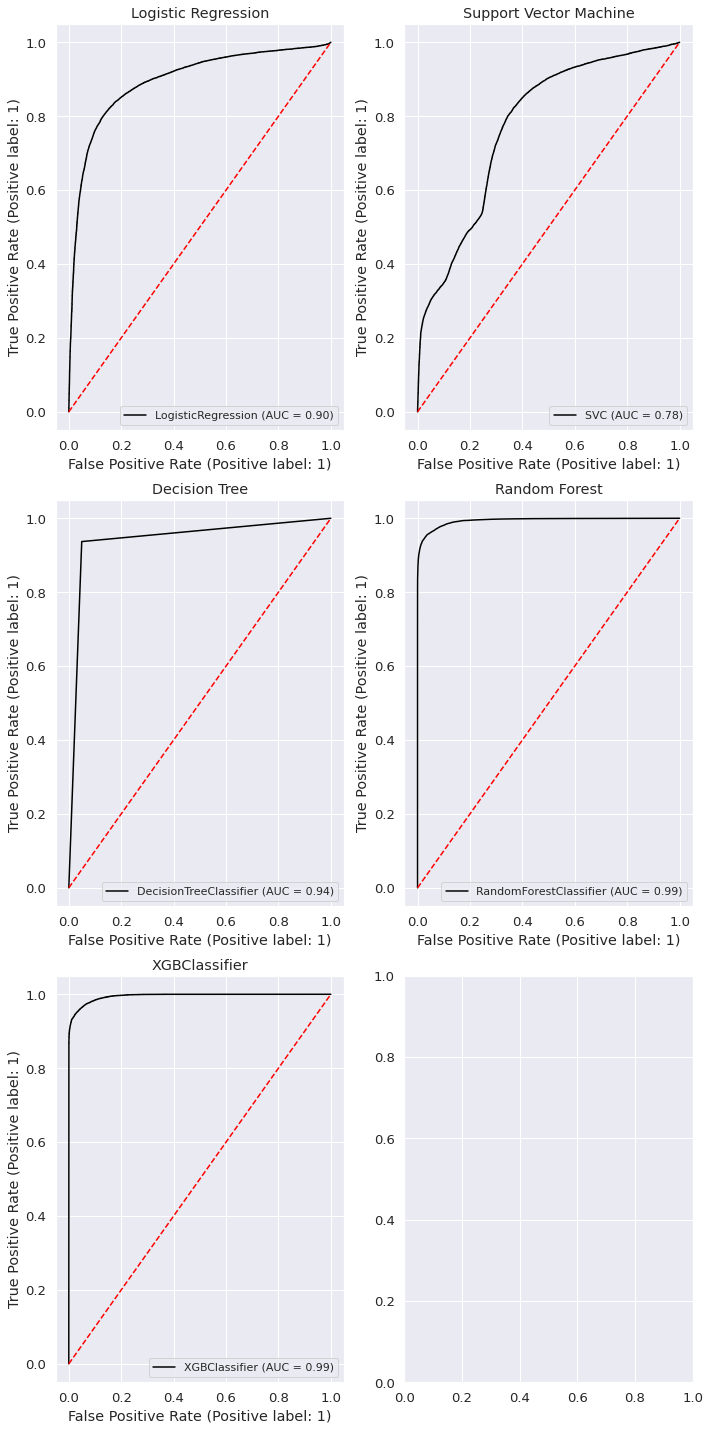

In [49]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(10,20))
line = np.linspace(0,1)


sns.set(font_scale=1.0)
for clf, ax,name in zip(clf_list, axes.flatten(),clf_name_list):
    plot_roc_curve(clf, X_test, y_test, ax=ax, color = 'black')
    ax.plot(line, line, color='red', linestyle='dashed')
    ax.title.set_text(name)
fig.tight_layout(pad=1.0)
plt.show()

**Notes:**
> As ww see best Acc in this data is **96%**